**Ce notebook est une copie de Prosper_clust_ML**

Les *users defined features* sont ajoutées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import spacy

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser, MergeDFAndComputeFeature
from featuring.machinelearning import MachineLearning

In [2]:
# import sys
# !{sys.executable} -m pip install -U spacy_langdetect
# !{sys.executable} -m spacy download en_core_web_md
# !{sys.executable} -m spacy download fr_core_news_md

#  Charger les data set

In [3]:
#%% load df
dfjson=pd.read_json("data\\bing_results.json")
df=pd.read_csv("data\\prop_wiki.csv")

# Class MergeDFAndComputeFeature

### Instancier la classe avec les 2 tableaux de données ‘snippet’ et ‘wiki’
*Method: .instantiate_df()*
### Nettoyer les adresses
*Method: .clean_address()*
### Calculer les features (ndot, nwords, bothnumsandwords)
*Method: .mergedf()*


In [4]:
#%% merge and compute features
mdf2=MergeDFAndComputeFeature(df1=dfjson, df2=df)
print(mdf2)

# load df1 & df2 within class
mdf2.instantiate_df()

# remove www. before computing features
mdf2.clean_adress()

# merge df & compute feature
mdf2.mergedf()

------------------------------------

shape is nrow:12975 and ncol:4 

      count_occur                               origin_query  \
0               2                extrudeuse machine learning   
1               2                extrudeuse machine learning   
10              1                extrudeuse machine learning   
100             2                extrudeuse machine learning   
1000            1  test inspection product testing recording   

                                                snippet  \
0     Advanced Manufacturing Agritech Aviation Maint...   
1     ANT Smart Factory is a user-friendly system, w...   
10    Technical Learning. How to wire an RTD and get...   
100   Understanding Swiss-Type Machining. Once seen ...   
1000  This test results in an enumeration of the tot...   

                         url  
0                amatrol.com  
1            antsolutions.eu  
10              in.omega.com  
100        www.mmsonline.com  
1000  www.foodtestinglab.com   

t

C:\Users\xavier\Documents\Prosper\featuring\functions.py:51: UserWarning: extension is not available for IP
  warnings.warn('extension is not available for IP')


### Pre processer les snippet pour le NLP
*Method: .nlp_preprocess(self, stop_fr=None, stop_en=None)*

Retire les ///, mets en minuscule, determine la langue, retire les stopwords, lemmatize

Possibilité d’ajouter des stop_words définis par l’utilisateur


In [5]:
#%% preprocess for NLP
mdf2.nlp_preprocess(stop_fr=None, stop_en=None)

raw french stopwords list loaded
raw english stopwords list loaded
--- waiting 3 seconds ---
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
la

language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
langu

language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is es
identified language is neither english nor french
language is fr
language is fr
language is en
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fa
identified language is neither english nor french
language is fa
identified language is neither english nor french
language is fr
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN


language is en
language is en
language is it
identified language is neither english nor french
language is fr
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is zh-tw
identified language is neither english nor fren

language is en
language is en
language is en
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is en
langu

language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language i

language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is da
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr


### Effectuer le NLP
*Method: .nlp_process(self,lang='fr',**kwargs)*

Choix d’une langue

Possibilité d’ajuster les ngram et les min max df

Calcule les tfidf



In [6]:
#%% process for NLP
mdf2.nlp_process(lang='fr', min_df=50, max_df=500, ngram_range=(1,2))

ngram_range is set to: (1, 2)
max_df is set to: 500
min_df is set to: 50
chosen language is French
tfidf computed, see tfidf & tfidf_features attributes


Réglages actuels:
- Ngram (1,2)
- min_df (50)
- max_df (500)

#### Questions:

Quels sont les *meilleurs* hyperparamètres (ngram, min/max df) ?

### Preparer les data set
*Method: .preparedataset(self, add_user_feature=True)*

Définies le tableau de features dfX et celui de la variable cible dfy (‘wiki’)

Possbilité d’ajouter les features définies par l’utilisateur ‘ndot’ et ‘bothnumsandswords’


In [7]:
#%% prepare data set
mdf2.preparedataset(add_user_feature=True)



data set prepared including features: 
 -ndot 
 -bothnumsandwords 

Shape is: 
 -nrow: 8112 
 -ncol: 895

 ------ data set ready ------



# Class MachineLearning

### Instancier la class avec les dataframe dfX et dfy
### Créer les jeux de données train & test
*Method: .split_data()*
### Possibilité de faire une PCA:
*Method: .do_pca()*

Si data set déjà divisé en train/ test .fit_transform(train) →  .transform(test) sinon .fit_transform(dfX)


In [8]:
#%% ML
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

# ml.do_pca() #optional


data were splitted with parameters: 
 -test_size: 0.5


### Instancier le classifier
*Method: .instantiate_classif()*

Choix entre random forest, logistic regression, naive bayes

Principaux hyperparamètres accessibles

### Entrainer le classifier et afficher le score et matrice de confusion
*Method: .fit_classif()*


**Classification : peut on prédire quels websites ont une page wikipedia ?**

In [9]:
ml.instantiate_classif(classifier='lr',
                       max_depth=15,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=3,
                       solver=None
                       )
ml.fit_classif()


 Classifier is logistic regression 

 hyperparameters are: 
 -C: 3
 -penalty: none
 -solver: lbfgs


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



 Score is 0.860
Confusion matrix is 
 [[3411  330]
 [ 239   76]]


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Bilan

- Mauvais score

Il est difficile de prédire quels website ont une page wikipedia

### Clustering
*Method: .do_dbscan()*

Pour le dbscan existe une methode *.find_dbscan()* qui recherche parmi plusieurs metriques et plusieurs eps la proportion d’individus (de lignes) assignée au groupe Erreur ou à un seul cluster

Principaux paramètres accessibles

*Method: .do_kmeans()*

Pour le kmeans existe une methode *.find_kmeans()* qui affiche le résultat de la méthode de Pham pour déterminer le nombre idéal de cluster

Voir ici pour le détail: [github Pham]( https://github.com/Vonatzki/pham_dimov_python/blob/master/Pham-Dimov%20Python%20Implementation.ipynb)


-----------------------------------------------
metrics tested will be: 
 ['jaccard', 'sqeuclidean', 'chebyshev']
-----------------------------------------------
eps tested will be: 
 [0.01, 0.1, 1, 10]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: sqeuclidean and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebyshev and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebysh

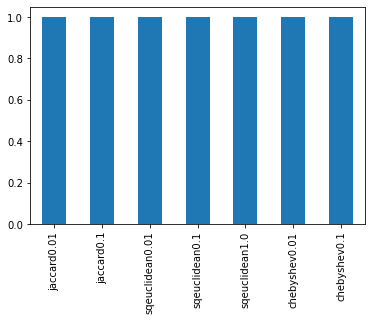

Number of dimensions detected: 895

CENTROID 1 || sk: 10805.743218592832	fk: 1.0	a: None
CENTROID 2 || sk: 8607.88218402112	fk: 0.7972706151329227	a: 0.9991620111731844
CENTROID 3 || sk: 8279.87595823673	fk: 0.9625668495390896	a: 0.9993016759776536
CENTROID 4 || sk: 8095.596121519536	fk: 0.9783129638562137	a: 0.9994180633147114
CENTROID 5 || sk: 8041.828735510787	fk: 0.9938404003258848	a: 0.9995150527622595
CENTROID 6 || sk: 7978.752884438706	fk: 0.9925576439987516	a: 0.9995958773018829
CENTROID 7 || sk: 7934.054863531797	fk: 0.9947328638527384	a: 0.9996632310849024
CENTROID 8 || sk: 7929.624615767909	fk: 0.9997221789871455	a: 0.9997193592374187
CENTROID 9 || sk: 7884.64831899484	fk: 0.9945606625673847	a: 0.999766132697849
CENTROID 10 || sk: 7866.392950572295	fk: 0.9978791707429644	a: 0.9998051105815409


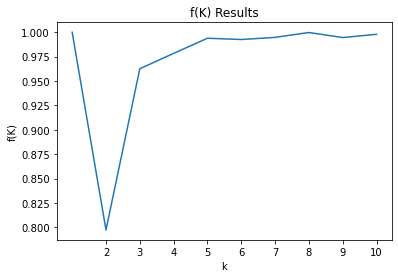


 ------ dbscan clustering done ------

{-1: 320, 0: 5505, 1: 261, 2: 1755, 3: 174, 4: 76, 5: 13, 6: 8}

------row: dbscan, col: wiki------
col_0   0.0  1.0
row_0           
-1      309   11
 0     4940  565
 1      259    2
 2     1721   34
 3      167    7
 4       72    4
 5       13    0
 6        8    0



------row: kmeans, col: wiki------
col_0   0.0  1.0
row_0           
0      2218   40
1      5271  583



------row: dbscan, col: kmeans------
col_0     0     1
row_0            
-1      145   175
 0        0  5505
 1      261     0
 2     1755     0
 3        0   174
 4       76     0
 5       13     0
 6        8     0



 N of website in each cluster (KMEANS)

1    5854
0    2258
Name: 0, dtype: int64


In [10]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

if True:
    ml.find_dbscan(metrics=['jaccard','sqeuclidean', 'chebyshev'], eps=[0.01,0.1,1,10], min_samples=4)

if True:
    ml.find_kmeans(max_k = 10)


ml.do_kmeans(nK=2)

ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
unique, counts = np.unique(ml.dfy_db, return_counts=True)
print(dict(zip(unique, counts)))

print('\n------row: dbscan, col: wiki------')
print(pd.crosstab(ml.dfy_db, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: kmeans, col: wiki------')
print(pd.crosstab(ml.dfy_kmeans, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: dbscan, col: kmeans------')
print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
cluster_dbscan=pd.DataFrame(ml.dfy_db)

print('\n N of website in each cluster (KMEANS)\n')
print(cluster_kmeans[0].value_counts())

In [11]:
# just for reload clustering

# ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)
# ml.do_kmeans(nK=2)
# cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)

#### Bilan:
- dbscan ne fonctionne pas, quelle que soit la métrique utilisée
- léger avantage pour k=2 avec le kmeans
- pas de lien a priori entre la variable wiki et les 2 clusters identifiés par Kmeans


# Machine learning & Clustering

###  Logistic Regression

In [12]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 1.000
Confusion matrix is 
 [[1119    0]
 [   0 2937]]

pca done?  False


#### Bilan:
- bon score du classifier sur le testing set sur les clusters identifiés par kmeans

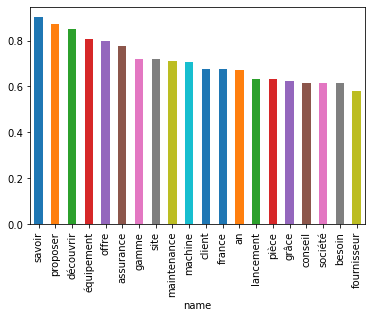

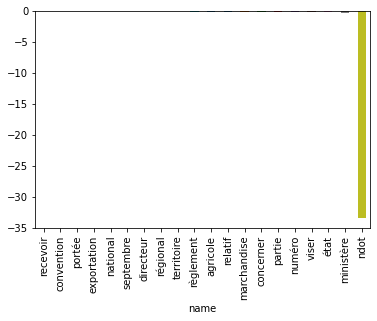

In [13]:
#%%
coef_lr=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.coef_[0].ravel())})

# print(coef_lr.sort_values('coef', ascending = False)[0:20])
# print(coef_lr.sort_values('coef', ascending = False)[-20::])

coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].plot.bar()
plt.show()

#### Bilan



### Random Forest

In [14]:
#%% ML with kmeans clusters 

ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='rf',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=1000,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is random forest 

 hyperparameters are: 
 -n_estimators: 1000
 -max_depth: 4
 -class_weight: balanced_subsample

 Score is 0.999
Confusion matrix is 
 [[1116    3]
 [   1 2936]]

pca done?  False


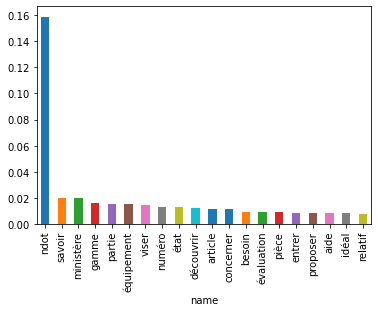

In [15]:
coef_rf=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.feature_importances_.ravel())})

# print(coef_rf.sort_values('coef', ascending = False)[0:20])

coef_rf.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()

# Analyses complémentaires

In [16]:
ax_X=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=1)
ax_Y=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=1)

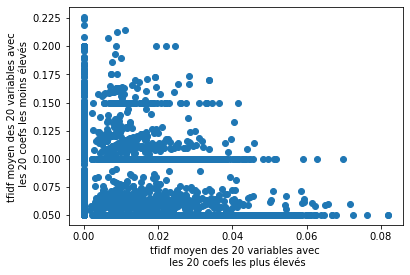

In [17]:
plt.scatter(ax_X,ax_Y)
plt.xlabel('tfidf moyen des 20 variables avec \n les 20 coefs les plus élevés')
plt.ylabel('tfidf moyen des 20 variables avec \n les 20 coefs les moins élevés')
plt.show()

In [18]:
mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0)

savoir         0.009868
proposer       0.011298
découvrir      0.009732
équipement     0.011292
offre          0.011709
assurance      0.012879
gamme          0.007624
site           0.012475
maintenance    0.013302
machine        0.011265
client         0.011355
france         0.010659
an             0.009633
lancement      0.011006
pièce          0.005613
grâce          0.007132
conseil        0.010510
société        0.007827
besoin         0.009243
fournisseur    0.010134
dtype: float64

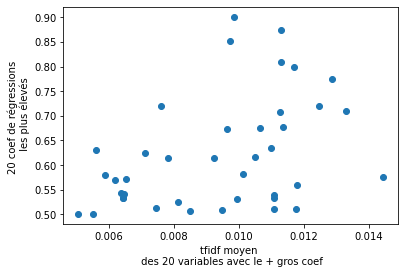

In [19]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40])
plt.xlabel('tfidf moyen \n des 20 variables avec le + gros coef')
plt.ylabel('20 coef de régressions \n les plus élevés')
plt.show()

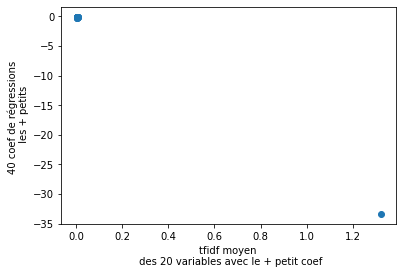

In [20]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::])
plt.xlabel('tfidf moyen \n des 20 variables avec le + petit coef')
plt.ylabel('40 coef de régressions \n les + petits')
plt.show()

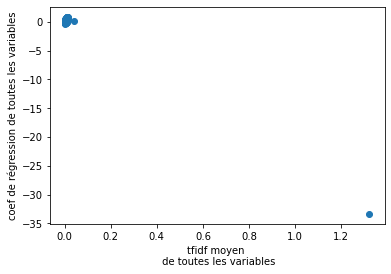

In [21]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef)
plt.ylabel('coef de régression de toutes les variables')
plt.xlabel('tfidf moyen \n de toutes les variables')
plt.show()

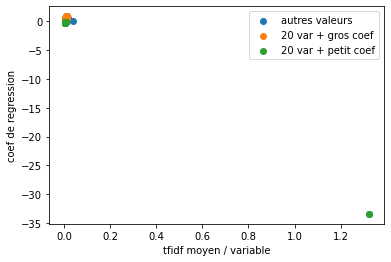

In [22]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef, label='autres valeurs')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], label='20 var + gros coef')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::], label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

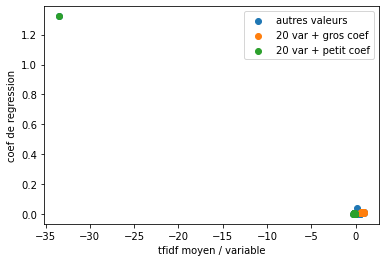

In [23]:
plt.scatter(coef_lr.coef,mdf2.dfX.mean(axis=0), label='autres valeurs')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], 
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
            label='20 var + gros coef')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::],
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
            label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

In [24]:
mot_cluster = pd.concat([pd.Series(mdf2.df_merged[mdf2.df_merged['language']=='fr'].url).reset_index(drop=True), cluster_kmeans.reset_index(drop=True)],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [25]:
mot_cluster.head()

,mot,cluster
0,www.ratp.fr,1
1,www.ratp.fr,1
2,www.ratp.fr,1
3,www.ratp.fr,1
4,www.ratp.fr,1


In [26]:
mot_cluster.shape

(8112, 2)

In [27]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot                                        
0        194.214.100.224:8090                           1
         1951.polytechnique.org                         1
         3m.loreval.fr                                  1
         52.force-ouvriere.org                          1
         53.force-ouvriere.org                          1
         94.citoyens.com                                1
         a06.apps.paris.fr                              1
         a190754.free.fr                                1
         aa-boschap-fr.resource.bosch.com               1
         aaa.public.lu                                  1
         aalberts-website.s3.eu-west-1.amazonaws.com    1
         account.ankama.com                             1
         account.mypcs.com                              1
         account.wacom.com                              1
         accueil.securitas.fr                           1
         accweb.mouv.desjardins.com                     1
         acim.nidec

In [28]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
2332,ec.europa.eu,0
6320,blog.turbosfrance.com,0
6318,bfmbusiness.bfmtv.com,0
6316,barreau.matthieu.free.fr,0
6315,babel.cegep-ste-foy.qc.ca,0
6313,assets.bose.com,0
6312,aspirateur.ooreka.fr,0
6311,alain.juge.pagesperso-orange.fr,0
6310,air-soft.gun-evasion.com,0
6322,boursinp.free.fr,0


In [29]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 0]

['www.scoop.developpement-durable.gouv.fr',
 'www.sieeen.orios-infos.com',
 'www.tresor.economie.gouv.fr',
 'www.truck.man.eu',
 'www.gov.mb.ca',
 'benelux.gefco.net',
 'br.advfn.com',
 'ch.gefco.net',
 'cheval.ooreka.fr',
 'creation-entreprise.ooreka.fr',
 'crifa.cshc.qc.ca',
 'equipementaerien.wordpress.com',
 'eshop.wurth.fr',
 'f4.quomodo.com',
 'faq.bmw.ch',
 'finder.porsche.com',
 'forum.hardware.fr',
 'fr-ww.bosch-automotive.com',
 'fr.aliexpress.com',
 'fr.brp.com',
 'fr.dirna.com',
 'fr.e-guide.renault.com',
 'fr.farnell.com',
 'fr.gefco.net',
 'fr.hktdc.com',
 'fr.roquette.com',
 'fr.wikihow.com',
 'french.auto-diagnosticstools.com',
 'french.portable-explosivedetector.com',
 'french.truckdiagnosticscanner.com',
 'ici.radio-canada.ca',
 'laroumanie.free.fr',
 'lentreprise.lexpress.fr',
 'media.group.renault.com',
 'media.groupe-psa.com',
 'media.toyota.ca',
 'media.toyota.fr',
 'monetiques.wordpress.com',
 'new.abb.com',
 'presse.credit-agricole.com',
 'prix-equipement.decisi

In [30]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 1]

['www.ratp.fr',
 'www.remorquerolland.com',
 'www.renault.fr',
 'www.safran-group.com',
 'www.scopex.fr',
 'www.se.com',
 'www.seat.fr',
 'www.senat.fr',
 'www.senseofwellness-mag.com',
 'www.service-public.fr',
 'www.setam.com',
 'www.skoda.fr',
 'www.smart.com',
 'www.societegenerale.com',
 'www.sojadis.com',
 'www.steyr-traktoren.com',
 'www.stone-wash.fr',
 'www.sydec40.fr',
 'www.tam-surplus.fr',
 'www.tcp-quad.com',
 'www.techno-science.net',
 'www.telip.fr',
 'www.tesla.com',
 'www.thebusinessplanshop.com',
 'www.thema-radiologie.fr',
 'www.tilt-equipement.com',
 'www.toro-distribution.com',
 'www.toro.com',
 'www.total.fr',
 'www.toyota.fr',
 'www.trakto.ca',
 'www.transportissimo.com',
 'www.truckchocdiscount.com',
 'www.ugap.fr',
 'www.universfreebox.com',
 'www.unoosa.org',
 'www.us-militaria.com',
 'www.usine-digitale.fr',
 'www.usinenouvelle.com',
 'www.utc.fr',
 'www.v-logistique.com',
 'www.valeo.com',
 'www.voiture-autonome.net',
 'www.volkswagen.fr',
 'www.volvogroup.f

Cluster 1: beaucoup d'assurances là dedans

# Classif & Clustering avec le data frame transposé

**Objectif**: regrouper les mots associés

**Bilan:** 

In [51]:
col_name=mdf2.df_merged[mdf2.df_merged['language']=='fr'].url

In [52]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=pd.DataFrame({'fake':range(0,mdf2.dfX.shape[1])}))
ml.do_pca(n_components=2)


dataset was NOT splitted, applying pca on dfX


In [53]:
ml.dfX

array([[ 1.28918802e+02, -4.42121090e-01],
       [ 3.18714075e+00,  1.72051418e+01],
       [-3.01909663e-01,  8.15680967e-03],
       ...,
       [-3.26150840e-01, -9.48272642e-03],
       [-1.92419809e-01, -3.55959141e-02],
       [-1.14102911e-01, -9.59121148e-03]])


-----------------------------------------------
metrics tested will be: 
 ['euclidean']
-----------------------------------------------
eps tested will be: 
 [0.05, 0.5, 5]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------



    eps     metric  Percentage_Err_Grp1
0  0.05  euclidean             0.994413
0  0.50  euclidean             1.000000
0  5.00  euclidean             1.000000

--------------------------------------------------

Percentage_Err_Grp1 represents the proportion of rows assignated either to Error group or to only One cluster by dbscan 
High ratio indicates non consistent clustering



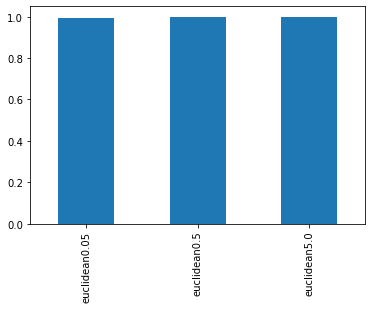

Number of dimensions detected: 2

CENTROID 1 || sk: 16978.39518415801	fk: 1.0	a: None
CENTROID 2 || sk: 339.5511988176622	fk: 0.03199842577672937	a: 0.625
CENTROID 3 || sk: 32.10955461653498	fk: 0.13754864326083643	a: 0.6875
CENTROID 4 || sk: 10.831632161133221	fk: 0.4561130580087809	a: 0.7395833333333334
CENTROID 5 || sk: 5.802490699435767	fk: 0.684173882453539	a: 0.7829861111111112
CENTROID 6 || sk: 3.9964029775211576	fk: 0.8407922216675692	a: 0.8191550925925927
CENTROID 7 || sk: 3.2355299357557055	fk: 0.9532726117658283	a: 0.8492959104938272
CENTROID 8 || sk: 2.671675855112295	fk: 0.9443252646609382	a: 0.8744132587448561
CENTROID 9 || sk: 2.43357176000751	fk: 1.0173497399290854	a: 0.8953443822873801
CENTROID 10 || sk: 2.1797830721346605	fk: 0.9812952110449353	a: 0.9127869852394834
CENTROID 11 || sk: 1.9931341807919214	fk: 0.9860353156707536	a: 0.9273224876995695
CENTROID 12 || sk: 1.79521971412859	fk: 0.958769361964294	a: 0.939435406416308
CENTROID 13 || sk: 1.6445554968749372	fk: 0

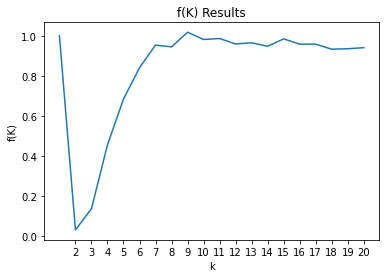

In [54]:
if True:
    ml.find_dbscan(metrics=['euclidean'], eps=[0.05, 0.5, 5], min_samples=5)

if True:
    ml.find_kmeans(max_k = 20)



In [55]:
ml.do_kmeans(nK=2)

# ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
# unique, counts = np.unique(ml.dfy_db, return_counts=True)
# print(dict(zip(unique, counts)))


# print('\n------row: dbscan, col: kmeans------')
# print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
# print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
# cluster_dbscan=pd.DataFrame(ml.dfy_db)

In [56]:
pd.Series(cluster_kmeans[0]).value_counts()

0    894
1      1
Name: 0, dtype: int64

In [57]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=cluster_kmeans)
ml.do_pca(n_components=2)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


dataset was NOT splitted, applying pca on dfX

data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 1.000
Confusion matrix is 
 [[448]]

pca done?  True


In [58]:
pd.DataFrame(ml.dfX).head()

,0,1
0,128.918802,-0.442121
1,3.187141,17.205142
2,-0.301910,0.008157
3,-0.198182,0.045176
4,-0.095460,-0.006515


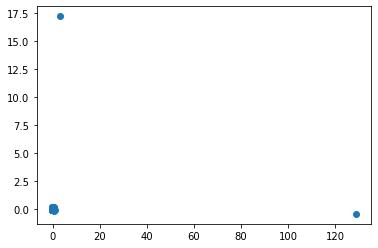

In [59]:
plt.scatter(pd.DataFrame(ml.dfX)[0],pd.DataFrame(ml.dfX)[1])

In [60]:
mot_cluster = pd.concat([pd.Series(mdf2.dfX.T.index), cluster_kmeans],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [61]:
mot_cluster.shape

(895, 2)

In [62]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot             
0        accepter            1
         accessoire          1
         accident            1
         accompagner         1
         accord              1
         accueil             1
         accès               1
         accéder             1
         achat               1
         acheter             1
         acquisition         1
         acteur              1
         actif               1
         action              1
         activité            1
         actualité           1
         actuel              1
         actuellement        1
         adapter             1
         adapter besoin      1
         adapté              1
         administratif       1
         administration      1
         adopter             1
         adresse             1
         affairer            1
         afficher            1
         agence              1
         agent               1
         agir                1
                            ..
         âge 

In [63]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
447,jeune,0
589,outil,0
590,ouverture,0
591,page,0
592,paiement,0
593,panne,0
594,parc,0
595,parcours,0
596,pari,0
597,part,0


In [64]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 0]

['bothnumsandwords',
 'accepter',
 'accessoire',
 'accident',
 'accompagner',
 'accord',
 'accueil',
 'accès',
 'accéder',
 'achat',
 'acheter',
 'acquisition',
 'acteur',
 'actif',
 'action',
 'activité',
 'actualité',
 'actuel',
 'actuellement',
 'adapter',
 'adapter besoin',
 'adapté',
 'administratif',
 'administration',
 'adopter',
 'adresse',
 'affairer',
 'afficher',
 'agence',
 'agent',
 'agir',
 'agricole',
 'aide',
 'aider',
 'air',
 'ajouter',
 'alerte',
 'alimentaire',
 'alimentation',
 'aller',
 'amélioration',
 'améliorer',
 'aménagement',
 'an',
 'analyse',
 'analyser',
 'and',
 'annoncer',
 'annuel',
 'année',
 'anticiper',
 'appareil',
 'appel',
 'appeler',
 'application',
 'appliquer',
 'apporter',
 'apprendre',
 'apprentissage',
 'approche',
 'appuyer',
 'arme',
 'armement',
 'arrêt',
 'article',
 'artificiel',
 'assistance',
 'association',
 'associer',
 'assurance',
 'atelier',
 'attaquer',
 'atteindre',
 'attendre',
 'attente',
 'attention',
 'audit',
 'augmentati

In [65]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 1]

['ndot']

In [66]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 2]

[]

In [67]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 3]

[]

In [68]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 4]

[]